# DDA3020 - Tutorial 2: Linear Algebra \& Linear Regression

*Xudong Wang 王旭东*

*xudongwang@link.cuhk.edu.cn*

*School of Data Science*

*The Chinese University of Hongkong, Shenzhen*

*2022.09.20*

In [1]:
import warnings; warnings.filterwarnings('ignore')

# Linear Algebra in Python

## Basic Matrix Vector Operations
please pay attention to assigning shape and an appropriate representation based on your application for numpy Ndarray.

In [2]:
import numpy as np
import math 
import scipy 
np.random.seed(3020)

## Numpy Linear Algebra Algorithms

In [3]:
print([method for method in dir(np.linalg) if '__' not in method])

['LinAlgError', '_umath_linalg', 'absolute_import', 'cholesky', 'cond', 'det', 'division', 'eig', 'eigh', 'eigvals', 'eigvalsh', 'inv', 'lapack_lite', 'linalg', 'lstsq', 'matrix_power', 'matrix_rank', 'multi_dot', 'norm', 'pinv', 'print_function', 'qr', 'slogdet', 'solve', 'svd', 'tensorinv', 'tensorsolve', 'test']


In [4]:
print(np.linalg.norm([1,2,3,4]),np.linalg.norm([1,2,3,4],1))
print(np.linalg.matrix_rank([1,2,3,4]))
print(np.linalg.det(np.ones((2,2))),np.diag([1,2,3,4]),np.linalg.det(np.diag([1,2,3,4])))  

5.477225575051661 10.0
1
0.0 [[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]] 23.999999999999993


In [5]:
np.linalg.eigvals(np.diag([1,2,3,4])) 

array([1., 2., 3., 4.])

In [6]:
np.linalg.eig(np.diag([1,2,3,4]))  

(array([1., 2., 3., 4.]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

In [7]:
# check the document.
# help(np.linalg.norm)

## Dot product

In [8]:
a = np.array([1,2]).reshape(2,1)
b = np.array([3,4])
b.shape = (2,1) # This is inplace handle, directly change the shape attribute of b
print(a.shape,b.shape)

(2, 1) (2, 1)


Generic matrix/vector multiplication 

In [9]:
print(np.vdot(a,b)) 
# print(a.dot(b)) # ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)
print(np.array([1,2]).shape) # default in 1-d, regard as vector.
print(np.array([1,2]).dot(np.array([3,4])))

11
(2,)
11


In [10]:
np.vdot(a,b).shape # Scalar

()

## Inner Product
Note: Numpy automatically transposes the second argument, so we need to account for this implementation. This implies we define a and b as row vectors, so inner product is $A.B^T$

In [11]:
a = a.reshape(1,2)
b = b.reshape(1,2)

In [12]:
print(np.inner(b,a), np.inner(b,a).shape) 

[[11]] (1, 1)


In [13]:
print(np.dot(a, np.transpose(b)),np.dot(a, np.transpose(b)).shape)
print(np.dot(a, b.T),np.dot(a, b.T).shape)
print(a.dot(b.T),a.dot(b.T).shape)

[[11]] (1, 1)
[[11]] (1, 1)
[[11]] (1, 1)


## Outer product
Similar note of caution as with inner product. Outer product is $A^T.B$

In [14]:
print(a,b)
print(np.outer(a,b), np.outer(a,b).shape) 

[[1 2]] [[3 4]]
[[3 4]
 [6 8]] (2, 2)


In [15]:
print(np.dot(np.transpose(a), b),np.dot(np.transpose(a), b).shape)
print(np.dot(a.T, b),np.dot(a.T, b).shape)
print(a.T.dot(b),a.T.dot(b).shape)

[[3 4]
 [6 8]] (2, 2)
[[3 4]
 [6 8]] (2, 2)
[[3 4]
 [6 8]] (2, 2)


## Kronecker Product - Generalization of Outer Product to Matrices

dim(A$\otimes$B) = dim(A) $\times$ dim(B)
in the example below, A and B are each (2,2) so kron(A,B) is (4,4)

##Kronecker Product - Generalization of Outer Product to Matrices
dim(A$\otimes$B) = dim(A) $\times$ dim(B)
in the example below, A and B are each (2,2) so kron(A,B) is (4,4)

In [16]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
print(a.shape,b.shape)
print(a,'\n',b)

(2, 2) (2, 2)
[[1 2]
 [3 4]] 
 [[5 6]
 [7 8]]


In [17]:
np.kron(a,b)

array([[ 5,  6, 10, 12],
       [ 7,  8, 14, 16],
       [15, 18, 20, 24],
       [21, 24, 28, 32]])

In [18]:
print(np.matmul(a, np.transpose(b)))
print(a.dot(b.T)) 
print(a.dot(b)) 

[[17 23]
 [39 53]]
[[17 23]
 [39 53]]
[[19 22]
 [43 50]]


## Applying Functions on Arrays
Numpy provides many functions to apply aggregate functions over arrays


In [19]:
import numpy as np
from numpy import random

In [20]:
# ndarray support math calculate from math package.
import math
from math import sqrt
a = np.random.normal(10, 2, 100) # pick 100 values from a normal dist with mean 2 and sd of 2
print(np.sum(a)) # add them up
print(math.fsum(a))

972.9122598556826
972.9122598556825


In [21]:
np.mean(a) # find thier mean hopefully close to 10

9.729122598556826

In [22]:
print(sqrt(a.var())) ## similarly can find variance or std deviation
print(a.std()) 

1.745505848270528
1.745505848270528


For multi-dimensional arrays we will have to specify the axis argument to let numpy know we are interested in running the calculation along a particular axis only

In [23]:
a = a.reshape((10,10)) # reshape a into a 10 x 10 matrix

Now perform any of the above operations by specifying an axis

In [24]:
np.mean(a, axis = 0) # row wise means

array([ 9.87971785,  8.78532663, 10.46787871, 10.34352326,  9.06138705,
        9.75170329,  9.71158607,  9.40572926, 10.48316634,  9.40120752])

In [25]:
print([np.mean(a[:,i]) for i in range(a.shape[1])]) 

[9.879717851831924, 8.78532663146602, 10.467878705523997, 10.34352326200277, 9.061387048993671, 9.751703293427987, 9.711586069673851, 9.405729261935587, 10.483166344282154, 9.401207516430283]


In [26]:
np.var(a, axis = 0) # row wise variances

array([5.19146841, 4.59574648, 3.63753587, 1.32201885, 1.12150729,
       2.29505394, 0.79426702, 3.77441507, 3.82230554, 0.84952797])

In [27]:
np.sum(a, axis = 0)

array([ 98.79717852,  87.85326631, 104.67878706, 103.43523262,
        90.61387049,  97.51703293,  97.1158607 ,  94.05729262,
       104.83166344,  94.01207516])

## Comparing Arrays
Operations on arrays are performed element by element. This can be used to perform logical selections

In [28]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a > b 

array([False, False, False])

In [29]:
c = np.concatenate((a,b)) # Ref tut1, you can have many way to concatenate, like use stack.
print ("c is a and b concatenated : " + str(c))
select = c > 2
cp = c[select]
print("Values in c that are greater than 2: " + str(cp))

c is a and b concatenated : [1 2 3 4 5 6]
Values in c that are greater than 2: [3 4 5 6]


## Applying Functions on Arrays
Functions are applied element by element

In [30]:
a = np.array([2,4,8, 16])
np.log2(a) # apply the log function along a

array([1., 2., 3., 4.])

## Arithmetic Operations Using Arrays
Element-Wise


Again, these are performed element by element - please note that this not matrix type operation.

In [31]:
a = np.array([[1,2],[3,4]], float)
b = np.array([[5,6],[7,8]], float)

In [32]:
a + b

array([[ 6.,  8.],
       [10., 12.]])

In [33]:
a*b

array([[ 5., 12.],
       [21., 32.]])

In [34]:
a/b # watch out for divide by zero - need to use special techniques if arrays contain very small numbers

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

## Numpy Broadcasting
Broadcasting is an important concept in numpy to handle situations where we perform arithmetic opertions where the operands are not of the same size. For example adding a scalar to a matrix. In this case, numpy converts the smaller operand to the size of the bigger operand behind the scenes so that this addition is possible. This is a crucial concept to keep in mind. The rules are quite elaborate and can be found here: https://numpy.org/doc/stable/user/basics.broadcasting.html

**General Broadcasting Rules**

<p>When operating on two arrays, NumPy compares their shapes element-wise.
It starts with the trailing (i.e. rightmost) dimensions and works its
way left.  Two dimensions are compatible when</p>

<ol class="arabic simple">
<li><p>they are equal, or</p></li>
<li><p>one of them is 1</p></li>
</ol>

<p>If these conditions are not met, a
<code class="docutils literal notranslate"><span class="pre">ValueError:</span> <span class="pre">operands</span> <span class="pre">could</span> <span class="pre">not</span> <span class="pre">be</span> <span class="pre">broadcast</span> <span class="pre">together</span></code> exception is
thrown, indicating that the arrays have incompatible shapes. The size of
the resulting array is the size that is not 1 along each axis of the inputs.</p>

![A scalar is broadcast to match the shape of the 1-d array it is being multiplied to.](./broadcasting_1.png)

> _Figure 1_#

> _In the simplest example of broadcasting, the scalar_ `b` _is stretched to become an array of same shape as_ `a` _so the shapes are compatible for element-by-element multiplication._

In [35]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

![A 1-d array with shape (3) is stretched to match the 2-d array of shape (4, 3) it is being added to, and the result is a 2-d array of shape (4, 3).](./broadcasting_2.png)

> _Figure 2_#

> _A one dimensional array added to a two dimensional array results in broadcasting if number of 1-d array elements matches the number of 2-d array columns._

![A huge cross over the 2-d array of shape (4, 3) and the 1-d array of shape (4) shows that they can not be broadcast due to mismatch of shapes and thus produce no result.](./broadcasting_3.png)

> _Figure 3_#

> _When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the rows of the 1st array with the elements of the 2nd arrays for element-by-element addition._

In [36]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
print(a + b)
b = np.array([1.0, 2.0, 3.0, 4.0])
# a + b
# Traceback (most recent call last):
# ValueError: operands could not be broadcast together with shapes (4,3) (4,)

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


In [37]:
A = np.arange(1, 10, 1)
A = A.reshape((3,3)) # create a 3 x 3 matrix
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
A = A + 5
A

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [39]:
b = np.array([1,2,3])
b = b.reshape((3,1))
b

array([[1],
       [2],
       [3]])

In [40]:
C = A + b
C

array([[ 7,  8,  9],
       [11, 12, 13],
       [15, 16, 17]])

# Least Square & Linear Regression and its Optimization

<p>The following are a set of methods intended for regression in which
the target value is expected to be a linear combination of the features.
In mathematical notation, if <span class="math notranslate nohighlight"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" tabindex="0" ctxtmenu_counter="0" style="font-size: 118.8%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-texatom texclass="ORD"><mjx-mover><mjx-over style="padding-bottom: 0.105em; padding-left: 0.301em; margin-bottom: -0.531em;"><mjx-mo class="mjx-n" style="width: 0px; margin-left: -0.25em;"><mjx-c class="mjx-c5E"></mjx-c></mjx-mo></mjx-over><mjx-base><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D466 TEX-I"></mjx-c></mjx-mi></mjx-base></mjx-mover></mjx-texatom></mjx-math><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow data-mjx-texclass="ORD"><mover><mi>y</mi><mo stretchy="false">^</mo></mover></mrow></math></mjx-assistive-mml></mjx-container></span> is the predicted
value.</p>

$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$

<p>Across the module, we designate the vector <span class="math notranslate nohighlight"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" tabindex="0" ctxtmenu_counter="2" style="font-size: 118.8%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D464 TEX-I"></mjx-c></mjx-mi><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c3D"></mjx-c></mjx-mo><mjx-mo class="mjx-n" space="4"><mjx-c class="mjx-c28"></mjx-c></mjx-mo><mjx-msub><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D464 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c31"></mjx-c></mjx-mn></mjx-script></mjx-msub><mjx-mo class="mjx-n"><mjx-c class="mjx-c2C"></mjx-c></mjx-mo><mjx-mo class="mjx-n" space="2"><mjx-c class="mjx-c2E"></mjx-c></mjx-mo><mjx-mo class="mjx-n" space="2"><mjx-c class="mjx-c2E"></mjx-c></mjx-mo><mjx-mo class="mjx-n" space="2"><mjx-c class="mjx-c2E"></mjx-c></mjx-mo><mjx-mo class="mjx-n" space="2"><mjx-c class="mjx-c2C"></mjx-c></mjx-mo><mjx-msub space="2"><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D464 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-mi class="mjx-i" size="s"><mjx-c class="mjx-c1D45D TEX-I"></mjx-c></mjx-mi></mjx-script></mjx-msub><mjx-mo class="mjx-n"><mjx-c class="mjx-c29"></mjx-c></mjx-mo></mjx-math><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>w</mi><mo>=</mo><mo stretchy="false">(</mo><msub><mi>w</mi><mn>1</mn></msub><mo>,</mo><mo>.</mo><mo>.</mo><mo>.</mo><mo>,</mo><msub><mi>w</mi><mi>p</mi></msub><mo stretchy="false">)</mo></math></mjx-assistive-mml></mjx-container></span> as <code class="docutils literal notranslate"><span class="pre">coef_</span></code> and <span class="math notranslate nohighlight"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" tabindex="0" ctxtmenu_counter="3" style="font-size: 118.8%; position: relative;"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-msub><mjx-mi class="mjx-i"><mjx-c class="mjx-c1D464 TEX-I"></mjx-c></mjx-mi><mjx-script style="vertical-align: -0.15em;"><mjx-mn class="mjx-n" size="s"><mjx-c class="mjx-c30"></mjx-c></mjx-mn></mjx-script></mjx-msub></mjx-math><mjx-assistive-mml unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>w</mi><mn>0</mn></msub></math></mjx-assistive-mml></mjx-container></span> as <code class="docutils literal notranslate"><span class="pre">intercept_</span></code>.</p>

## Least Square

Recap the tutorial 1, we have learn the basic Sklearn API and linear Regression

> `LinearRegression` fits a linear model with coefficients w=(w1,...,wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

$\min_{w} || X w - y||_2^2$

## Solve Linear Regression by Sklearn

LinearRegression()
[[2.04241556]] [-1.38274542]


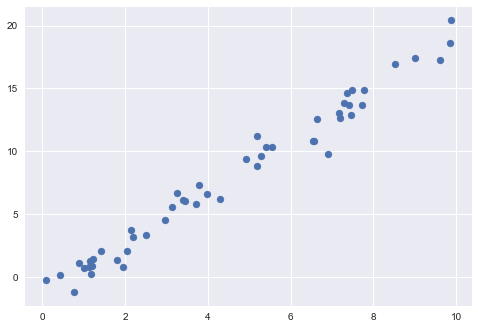

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

rng = np.random.RandomState(3020) # get a random seeds generator
x = 10 * rng.rand(50)
X = x[:, np.newaxis] # Recap the numpy usage. We can also use X = x.reshape(-1,1)
y = 2 * x - 1 + rng.randn(50)
y.shape = (-1,1)
plt.scatter(x, y);

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
print(model) # LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

model.fit(X, y) # LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print(model.coef_,model.intercept_)

## Optimization For Least Square Problem (Scipy, Close form Sol)

### Toy demo for one varible optimization

In [42]:
x1 = np.asmatrix(np.linspace(0, 1, 20))
w = 10
y = w*x1

In [43]:
def loss(wp):
    res = y - wp*x1
    return np.sum(np.power(res, 2))

In [44]:
from scipy import optimize
p0 = 0
opt_cg = optimize.minimize(loss, p0, method='CG')
print(opt_cg) 

fprime = lambda x: optimize.approx_fprime(x, loss, 0.0001)
opt_NtCG = optimize.minimize(loss, p0,  method='Newton-CG',jac = fprime)
print(opt_NtCG)

     fun: 3.0009911130632097e-13
     jac: array([2.96783024e-06])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 10
  status: 0
 success: True
       x: array([10.00000021])
     fun: 2.5454482651074573e-10
     jac: array([0.00060075])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 26
    nhev: 0
     nit: 1
    njev: 16
  status: 2
 success: False
       x: array([9.9999939])


Ref Scipy official document for more methods. 

<dd><p>Type of solver.  Should be one of</p>
<blockquote>
<div><ul class="simple">
<li><p>‘Nelder-Mead’ <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘Powell’      <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-powell.html#optimize-minimize-powell"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘CG’          <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cg.html#optimize-minimize-cg"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘BFGS’        <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html#optimize-minimize-bfgs"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘Newton-CG’   <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-newtoncg.html#optimize-minimize-newtoncg"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘L-BFGS-B’    <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html#optimize-minimize-lbfgsb"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘TNC’         <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-tnc.html#optimize-minimize-tnc"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘COBYLA’      <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cobyla.html#optimize-minimize-cobyla"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘SLSQP’       <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html#optimize-minimize-slsqp"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘trust-constr’<a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustconstr.html#optimize-minimize-trustconstr"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘dogleg’      <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-dogleg.html#optimize-minimize-dogleg"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘trust-ncg’   <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustncg.html#optimize-minimize-trustncg"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘trust-exact’ <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustexact.html#optimize-minimize-trustexact"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>‘trust-krylov’ <a class="reference internal" href="https://docs.scipy.org/doc/scipy/reference/optimize.minimize-trustkrylov.html#optimize-minimize-trustkrylov"><span class="std std-ref">(see here)</span></a></p></li>
<li><p>custom - a callable object (added in version 0.14.0),
see below for description.</p></li>
</ul>
</div></blockquote>
<p>If not given, chosen to be one of <code class="docutils literal notranslate"><span class="pre">BFGS</span></code>, <code class="docutils literal notranslate"><span class="pre">L-BFGS-B</span></code>, <code class="docutils literal notranslate"><span class="pre">SLSQP</span></code>,
depending on whether or not the problem has constraints or bounds.</p>
</dd>

### Back to Linear Regression example with intercept

In [45]:
rng = np.random.RandomState(3020) # get a random seeds generator
x = 10 * rng.rand(50)
X = x[:, np.newaxis] # Recap the numpy usage. We can also use X = x.reshape(-1,1)
y = 2 * x - 1 + rng.randn(50)
y.shape = (-1,1)

def loss(p):
    w = p[0]
    b = p[1]
    res = y - w*X - b
    return np.sum(np.power(res, 2))

w_0,b_0 = 0.0,0.0
opt_cg = optimize.minimize(loss,[w_0,b_0], method='CG')
print(opt_cg) 

     fun: 41.32325782822299
     jac: array([6.67572021e-06, 7.15255737e-06])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([ 2.04241551, -1.38274514])


In [46]:
# compare sklearn 
print(model.coef_,model.intercept_)

[[2.04241556]] [-1.38274542]


### Close form Solution 


<p>You have a design matrix
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-12-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>X</mi><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>11</mn></mrow></msub></mtd><mtd><mo>&amp;#x22EF;</mo></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>1</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>21</mn></mrow></msub></mtd><mtd><mo>&amp;#x22EF;</mo></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mo>&amp;#x22EE;</mo></mtd><mtd><mo>&amp;#x22EE;</mo></mtd><mtd /><mtd><mo>&amp;#x22EE;</mo></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>m</mi><mn>1</mn></mrow></msub></mtd><mtd><mo>&amp;#x22EF;</mo></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>m</mi><mi>n</mi></mrow></msub></mtd></mtr></mtable><mo>]</mo></mrow></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-136" style="width: 12.315em; display: inline-block;"><span style="display: inline-block; position: relative; width: 11.054em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(2.225em, 1010.99em, 8.111em, -999.997em); top: -5.402em; left: 0em;"><span class="mrow" id="MathJax-Span-137"><span class="mi" id="MathJax-Span-138" style="font-family: STIXGeneral-Italic;">𝑋<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-139" style="font-family: STIXGeneral-Regular; padding-left: 0.303em;">=</span><span class="mrow" id="MathJax-Span-140" style="padding-left: 0.303em;"><span class="mo" id="MathJax-Span-141" style="vertical-align: 3.006em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: 1.204em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.399em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.498em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -0.598em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: 0.303em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="mtable" id="MathJax-Span-142"><span style="display: inline-block; position: relative; width: 7.751em; height: 0px; margin-right: 0.183em; margin-left: 0.183em;"><span style="position: absolute; clip: rect(3.186em, 1000.42em, 8.772em, -999.997em); top: -6.243em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.544em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.42em, 4.207em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-143"><span class="mrow" id="MathJax-Span-144"><span class="mn" id="MathJax-Span-145" style="font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.186em, 1000.42em, 4.207em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-164"><span class="mrow" id="MathJax-Span-165"><span class="mn" id="MathJax-Span-166" style="font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.12em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-185"><span class="mrow" id="MathJax-Span-186"><span class="mo" id="MathJax-Span-187" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.186em, 1000.42em, 4.207em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-196"><span class="mrow" id="MathJax-Span-197"><span class="mn" id="MathJax-Span-198" style="font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.249em;"></span></span><span style="position: absolute; clip: rect(3.306em, 1001.5em, 8.772em, -999.997em); top: -6.123em; left: 1.625em;"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.327em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-146"><span class="mrow" id="MathJax-Span-147"><span class="msubsup" id="MathJax-Span-148"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-149" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-150"><span class="mrow" id="MathJax-Span-151"><span class="mn" id="MathJax-Span-152" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">11</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.327em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-167"><span class="mrow" id="MathJax-Span-168"><span class="msubsup" id="MathJax-Span-169"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-170" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-171"><span class="mrow" id="MathJax-Span-172"><span class="mn" id="MathJax-Span-173" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">21</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.12em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-188"><span class="mrow" id="MathJax-Span-189"><span class="mo" id="MathJax-Span-190" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.5em, 4.387em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.718em;"><span class="mtd" id="MathJax-Span-199"><span class="mrow" id="MathJax-Span-200"><span class="msubsup" id="MathJax-Span-201"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-202" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-203"><span class="mrow" id="MathJax-Span-204"><span class="mi" id="MathJax-Span-205" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑚</span><span class="mn" id="MathJax-Span-206" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.129em;"></span></span><span style="position: absolute; clip: rect(3.006em, 1000.84em, 8.051em, -999.997em); top: -5.703em; left: 4.267em;"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px;"><span style="position: absolute; clip: rect(3.547em, 1000.84em, 4.027em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-153"><span class="mrow" id="MathJax-Span-154"><span class="mo" id="MathJax-Span-155" style="font-family: STIXGeneral-Regular;">⋯</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.547em, 1000.84em, 4.027em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-174"><span class="mrow" id="MathJax-Span-175"><span class="mo" id="MathJax-Span-176" style="font-family: STIXGeneral-Regular;">⋯</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.847em, 1000em, 4.207em, -999.997em); top: -3.12em; left: 50%; margin-left: 0em;"><span class="mtd" id="MathJax-Span-191"><span class="mrow" id="MathJax-Span-192"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.547em, 1000.84em, 4.027em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-207"><span class="mrow" id="MathJax-Span-208"><span class="mo" id="MathJax-Span-209" style="font-family: STIXGeneral-Regular;">⋯</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 5.709em;"></span></span><span style="position: absolute; clip: rect(3.306em, 1001.5em, 8.772em, -999.997em); top: -6.123em; left: 6.309em;"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.387em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-156"><span class="mrow" id="MathJax-Span-157"><span class="msubsup" id="MathJax-Span-158"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-159" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-160"><span class="mrow" id="MathJax-Span-161"><span class="mn" id="MathJax-Span-162" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="mi" id="MathJax-Span-163" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.387em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-177"><span class="mrow" id="MathJax-Span-178"><span class="msubsup" id="MathJax-Span-179"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-180" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-181"><span class="mrow" id="MathJax-Span-182"><span class="mn" id="MathJax-Span-183" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">2</span><span class="mi" id="MathJax-Span-184" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.12em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-193"><span class="mrow" id="MathJax-Span-194"><span class="mo" id="MathJax-Span-195" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.5em, 4.387em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.718em;"><span class="mtd" id="MathJax-Span-210"><span class="mrow" id="MathJax-Span-211"><span class="msubsup" id="MathJax-Span-212"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-213" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-214"><span class="mrow" id="MathJax-Span-215"><span class="mi" id="MathJax-Span-216" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑚</span><span class="mi" id="MathJax-Span-217" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.129em;"></span></span></span></span><span class="mo" id="MathJax-Span-218" style="vertical-align: 3.006em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: 1.204em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.399em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.498em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -0.598em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: 0.303em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 5.408em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.863em; border-left: 0px solid; width: 0px; height: 6.337em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>X</mi><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>11</mn></mrow></msub></mtd><mtd><mo>⋯</mo></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>1</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>21</mn></mrow></msub></mtd><mtd><mo>⋯</mo></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mo>⋮</mo></mtd><mtd><mo>⋮</mo></mtd><mtd></mtd><mtd><mo>⋮</mo></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mi>m</mi><mn>1</mn></mrow></msub></mtd><mtd><mo>⋯</mo></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mi>m</mi><mi>n</mi></mrow></msub></mtd></mtr></mtable><mo>]</mo></mrow></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-12">
X=\begin{bmatrix} 1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & & \vdots \\
1 & x_{m1} & \cdots & x_{mn} \end{bmatrix}
</script>
Then
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-13-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>Y</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><mo>&amp;#x22EE;</mo></mtd></mtr><mtr><mtd><msub><mi>Y</mi><mi>m</mi></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>=</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>11</mn></mrow></msub></mtd><mtd><mo>&amp;#x22EF;</mo></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>1</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>21</mn></mrow></msub></mtd><mtd><mo>&amp;#x22EF;</mo></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>2</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mo>&amp;#x22EE;</mo></mtd><mtd><mo>&amp;#x22EE;</mo></mtd><mtd /><mtd><mo>&amp;#x22EE;</mo></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>m</mi><mn>1</mn></mrow></msub></mtd><mtd><mo>&amp;#x22EF;</mo></mtd><mtd><msub><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>m</mi><mi>n</mi></mrow></msub></mtd></mtr></mtable><mo>]</mo></mrow><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>&amp;#x03B2;</mi><mn>0</mn></msub></mtd></mtr><mtr><mtd><msub><mi>&amp;#x03B2;</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><mo>&amp;#x22EE;</mo></mtd></mtr><mtr><mtd><msub><mi>&amp;#x03B2;</mi><mi>n</mi></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>+</mo><mrow><mo>[</mo><mtable rowspacing=&quot;4pt&quot; columnspacing=&quot;1em&quot;><mtr><mtd><msub><mi>&amp;#x03B5;</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><mo>&amp;#x22EE;</mo></mtd></mtr><mtr><mtd><msub><mi>&amp;#x03B5;</mi><mi>m</mi></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>.</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-219" style="width: 20.904em; display: inline-block;"><span style="display: inline-block; position: relative; width: 18.802em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(2.225em, 1018.74em, 8.111em, -999.997em); top: -5.402em; left: 0em;"><span class="mrow" id="MathJax-Span-220"><span class="mrow" id="MathJax-Span-221"><span class="mo" id="MathJax-Span-222" style="vertical-align: 2.285em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: -0.237em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.58em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.799em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.018em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="mtable" id="MathJax-Span-223"><span style="display: inline-block; position: relative; width: 1.144em; height: 0px; margin-right: 0.183em; margin-left: 0.183em;"><span style="position: absolute; clip: rect(2.586em, 1001.14em, 6.85em, -999.997em); top: -4.922em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.144em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.96em, 4.327em, -999.997em); top: -5.523em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-224"><span class="mrow" id="MathJax-Span-225"><span class="msubsup" id="MathJax-Span-226"><span style="display: inline-block; position: relative; width: 0.964em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.72em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-227" style="font-family: STIXGeneral-Italic;">𝑌<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.183em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="mn" id="MathJax-Span-228" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.841em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-229"><span class="mrow" id="MathJax-Span-230"><span class="mo" id="MathJax-Span-231" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.186em, 1001.14em, 4.387em, -999.997em); top: -2.399em; left: 50%; margin-left: -0.538em;"><span class="mtd" id="MathJax-Span-232"><span class="mrow" id="MathJax-Span-233"><span class="msubsup" id="MathJax-Span-234"><span style="display: inline-block; position: relative; width: 1.144em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.72em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-235" style="font-family: STIXGeneral-Italic;">𝑌<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.183em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="mi" id="MathJax-Span-236" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑚</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.928em;"></span></span></span></span><span class="mo" id="MathJax-Span-237" style="vertical-align: 2.285em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: -0.237em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.58em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.799em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.018em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-238" style="font-family: STIXGeneral-Regular; padding-left: 0.303em;">=</span><span class="mrow" id="MathJax-Span-239" style="padding-left: 0.303em;"><span class="mo" id="MathJax-Span-240" style="vertical-align: 3.006em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: 1.204em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.399em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.498em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -0.598em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: 0.303em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="mtable" id="MathJax-Span-241"><span style="display: inline-block; position: relative; width: 7.751em; height: 0px; margin-right: 0.183em; margin-left: 0.183em;"><span style="position: absolute; clip: rect(3.186em, 1000.42em, 8.772em, -999.997em); top: -6.243em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.544em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.42em, 4.207em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-242"><span class="mrow" id="MathJax-Span-243"><span class="mn" id="MathJax-Span-244" style="font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.186em, 1000.42em, 4.207em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-263"><span class="mrow" id="MathJax-Span-264"><span class="mn" id="MathJax-Span-265" style="font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.12em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-284"><span class="mrow" id="MathJax-Span-285"><span class="mo" id="MathJax-Span-286" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.186em, 1000.42em, 4.207em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-295"><span class="mrow" id="MathJax-Span-296"><span class="mn" id="MathJax-Span-297" style="font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.249em;"></span></span><span style="position: absolute; clip: rect(3.306em, 1001.5em, 8.772em, -999.997em); top: -6.123em; left: 1.625em;"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.327em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-245"><span class="mrow" id="MathJax-Span-246"><span class="msubsup" id="MathJax-Span-247"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-248" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-249"><span class="mrow" id="MathJax-Span-250"><span class="mn" id="MathJax-Span-251" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">11</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.327em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-266"><span class="mrow" id="MathJax-Span-267"><span class="msubsup" id="MathJax-Span-268"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-269" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-270"><span class="mrow" id="MathJax-Span-271"><span class="mn" id="MathJax-Span-272" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">21</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.12em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-287"><span class="mrow" id="MathJax-Span-288"><span class="mo" id="MathJax-Span-289" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.5em, 4.387em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.718em;"><span class="mtd" id="MathJax-Span-298"><span class="mrow" id="MathJax-Span-299"><span class="msubsup" id="MathJax-Span-300"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-301" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-302"><span class="mrow" id="MathJax-Span-303"><span class="mi" id="MathJax-Span-304" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑚</span><span class="mn" id="MathJax-Span-305" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.129em;"></span></span><span style="position: absolute; clip: rect(3.006em, 1000.84em, 8.051em, -999.997em); top: -5.703em; left: 4.267em;"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px;"><span style="position: absolute; clip: rect(3.547em, 1000.84em, 4.027em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-252"><span class="mrow" id="MathJax-Span-253"><span class="mo" id="MathJax-Span-254" style="font-family: STIXGeneral-Regular;">⋯</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.547em, 1000.84em, 4.027em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-273"><span class="mrow" id="MathJax-Span-274"><span class="mo" id="MathJax-Span-275" style="font-family: STIXGeneral-Regular;">⋯</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.847em, 1000em, 4.207em, -999.997em); top: -3.12em; left: 50%; margin-left: 0em;"><span class="mtd" id="MathJax-Span-290"><span class="mrow" id="MathJax-Span-291"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.547em, 1000.84em, 4.027em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-306"><span class="mrow" id="MathJax-Span-307"><span class="mo" id="MathJax-Span-308" style="font-family: STIXGeneral-Regular;">⋯</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 5.709em;"></span></span><span style="position: absolute; clip: rect(3.306em, 1001.5em, 8.772em, -999.997em); top: -6.123em; left: 6.309em;"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.387em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-255"><span class="mrow" id="MathJax-Span-256"><span class="msubsup" id="MathJax-Span-257"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-258" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-259"><span class="mrow" id="MathJax-Span-260"><span class="mn" id="MathJax-Span-261" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span class="mi" id="MathJax-Span-262" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.32em, 4.387em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.658em;"><span class="mtd" id="MathJax-Span-276"><span class="mrow" id="MathJax-Span-277"><span class="msubsup" id="MathJax-Span-278"><span style="display: inline-block; position: relative; width: 1.324em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-279" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-280"><span class="mrow" id="MathJax-Span-281"><span class="mn" id="MathJax-Span-282" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">2</span><span class="mi" id="MathJax-Span-283" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.12em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-292"><span class="mrow" id="MathJax-Span-293"><span class="mo" id="MathJax-Span-294" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.5em, 4.387em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.718em;"><span class="mtd" id="MathJax-Span-309"><span class="mrow" id="MathJax-Span-310"><span class="msubsup" id="MathJax-Span-311"><span style="display: inline-block; position: relative; width: 1.505em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.48em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-312" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.544em;"><span class="texatom" id="MathJax-Span-313"><span class="mrow" id="MathJax-Span-314"><span class="mi" id="MathJax-Span-315" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑚</span><span class="mi" id="MathJax-Span-316" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.129em;"></span></span></span></span><span class="mo" id="MathJax-Span-317" style="vertical-align: 3.006em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: 1.204em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.399em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.498em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -0.598em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: 0.303em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span><span class="mrow" id="MathJax-Span-318" style="padding-left: 0.183em;"><span class="mo" id="MathJax-Span-319" style="vertical-align: 3.006em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: 1.204em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.399em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.498em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -0.598em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: 0.303em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="mtable" id="MathJax-Span-320"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px; margin-right: 0.183em; margin-left: 0.183em;"><span style="position: absolute; clip: rect(3.366em, 1000.9em, 9.132em, -999.997em); top: -6.423em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.9em, 4.387em, -999.997em); top: -6.243em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-321"><span class="mrow" id="MathJax-Span-322"><span class="msubsup" id="MathJax-Span-323"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.54em, 4.387em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-324" style="font-family: STIXGeneral-Italic;">𝛽<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.483em;"><span class="mn" id="MathJax-Span-325" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">0</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.186em, 1000.9em, 4.387em, -999.997em); top: -4.802em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-326"><span class="mrow" id="MathJax-Span-327"><span class="msubsup" id="MathJax-Span-328"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.54em, 4.387em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-329" style="font-family: STIXGeneral-Italic;">𝛽<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.483em;"><span class="mn" id="MathJax-Span-330" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.12em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-331"><span class="mrow" id="MathJax-Span-332"><span class="mo" id="MathJax-Span-333" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.186em, 1000.9em, 4.387em, -999.997em); top: -1.679em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-334"><span class="mrow" id="MathJax-Span-335"><span class="msubsup" id="MathJax-Span-336"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.54em, 4.387em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-337" style="font-family: STIXGeneral-Italic;">𝛽<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.483em;"><span class="mi" id="MathJax-Span-338" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.429em;"></span></span></span></span><span class="mo" id="MathJax-Span-339" style="vertical-align: 3.006em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: 1.204em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.399em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.498em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -0.598em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: 0.303em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-340" style="font-family: STIXGeneral-Regular; padding-left: 0.243em;">+</span><span class="mrow" id="MathJax-Span-341" style="padding-left: 0.243em;"><span class="mo" id="MathJax-Span-342" style="vertical-align: 2.285em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎡<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: -0.237em; left: 0em;">⎣<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.58em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.799em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.018em; left: 0em;">⎢<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="mtable" id="MathJax-Span-343"><span style="display: inline-block; position: relative; width: 1.084em; height: 0px; margin-right: 0.183em; margin-left: 0.183em;"><span style="position: absolute; clip: rect(2.586em, 1001.08em, 6.61em, -999.997em); top: -4.682em; left: 0em;"><span style="display: inline-block; position: relative; width: 1.084em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.9em, 4.327em, -999.997em); top: -5.523em; left: 50%; margin-left: -0.477em;"><span class="mtd" id="MathJax-Span-344"><span class="mrow" id="MathJax-Span-345"><span class="msubsup" id="MathJax-Span-346"><span style="display: inline-block; position: relative; width: 0.904em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.42em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-347" style="font-family: STIXGeneral-Italic;">𝜀</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.483em;"><span class="mn" id="MathJax-Span-348" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(2.826em, 1000.3em, 4.327em, -999.997em); top: -3.841em; left: 50%; margin-left: -0.237em;"><span class="mtd" id="MathJax-Span-349"><span class="mrow" id="MathJax-Span-350"><span class="mo" id="MathJax-Span-351" style="font-family: STIXGeneral-Regular;">⋮</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; clip: rect(3.426em, 1001.08em, 4.387em, -999.997em); top: -2.399em; left: 50%; margin-left: -0.538em;"><span class="mtd" id="MathJax-Span-352"><span class="mrow" id="MathJax-Span-353"><span class="msubsup" id="MathJax-Span-354"><span style="display: inline-block; position: relative; width: 1.084em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.42em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-355" style="font-family: STIXGeneral-Italic;">𝜀</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.901em; left: 0.483em;"><span class="mi" id="MathJax-Span-356" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑚</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.688em;"></span></span></span></span><span class="mo" id="MathJax-Span-357" style="vertical-align: 2.285em;"><span style="display: inline-block; position: relative; width: 0.423em; height: 0px;"><span style="position: absolute; font-family: STIXSizeOneSym; top: -3.36em; left: 0em;">⎤<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; font-family: STIXSizeOneSym; top: -0.237em; left: 0em;">⎦<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -2.58em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.799em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="font-family: STIXSizeOneSym; position: absolute; top: -1.018em; left: 0em;">⎥<span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span><span class="mo" id="MathJax-Span-358" style="font-family: STIXGeneral-Regular; padding-left: 0.183em;">.</span></span><span style="display: inline-block; width: 0px; height: 5.408em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -2.863em; border-left: 0px solid; width: 0px; height: 6.337em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>Y</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><mo>⋮</mo></mtd></mtr><mtr><mtd><msub><mi>Y</mi><mi>m</mi></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>=</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>11</mn></mrow></msub></mtd><mtd><mo>⋯</mo></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>1</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>21</mn></mrow></msub></mtd><mtd><mo>⋯</mo></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mn>2</mn><mi>n</mi></mrow></msub></mtd></mtr><mtr><mtd><mo>⋮</mo></mtd><mtd><mo>⋮</mo></mtd><mtd></mtd><mtd><mo>⋮</mo></mtd></mtr><mtr><mtd><mn>1</mn></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mi>m</mi><mn>1</mn></mrow></msub></mtd><mtd><mo>⋯</mo></mtd><mtd><msub><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mi>m</mi><mi>n</mi></mrow></msub></mtd></mtr></mtable><mo>]</mo></mrow><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>β</mi><mn>0</mn></msub></mtd></mtr><mtr><mtd><msub><mi>β</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><mo>⋮</mo></mtd></mtr><mtr><mtd><msub><mi>β</mi><mi>n</mi></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>+</mo><mrow><mo>[</mo><mtable rowspacing="4pt" columnspacing="1em"><mtr><mtd><msub><mi>ε</mi><mn>1</mn></msub></mtd></mtr><mtr><mtd><mo>⋮</mo></mtd></mtr><mtr><mtd><msub><mi>ε</mi><mi>m</mi></msub></mtd></mtr></mtable><mo>]</mo></mrow><mo>.</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-13">
\begin{bmatrix} Y_1 \\  \vdots \\ Y_m \end{bmatrix} = \begin{bmatrix} 1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & & \vdots \\
1 & x_{m1} & \cdots & x_{mn} \end{bmatrix}
\begin{bmatrix} \beta_0 \\  \beta_1 \\ \vdots \\  \beta_n \end{bmatrix}
+ \begin{bmatrix} \varepsilon_1 \\ \vdots \\ \varepsilon_m \end{bmatrix}.
</script>
Write this as
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-14-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>Y</mi><mo>=</mo><mi>X</mi><mi>&amp;#x03B2;</mi><mo>+</mo><mi>&amp;#x03B5;</mi><mo>.</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-359" style="width: 5.829em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.228em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(1.685em, 1005.17em, 2.886em, -999.997em); top: -2.52em; left: 0em;"><span class="mrow" id="MathJax-Span-360"><span class="mi" id="MathJax-Span-361" style="font-family: STIXGeneral-Italic;">𝑌<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.183em;"></span></span><span class="mo" id="MathJax-Span-362" style="font-family: STIXGeneral-Regular; padding-left: 0.303em;">=</span><span class="mi" id="MathJax-Span-363" style="font-family: STIXGeneral-Italic; padding-left: 0.303em;">𝑋<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-364" style="font-family: STIXGeneral-Italic;">𝛽<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-365" style="font-family: STIXGeneral-Regular; padding-left: 0.243em;">+</span><span class="mi" id="MathJax-Span-366" style="font-family: STIXGeneral-Italic; padding-left: 0.243em;">𝜀</span><span class="mo" id="MathJax-Span-367" style="font-family: STIXGeneral-Regular;">.</span></span><span style="display: inline-block; width: 0px; height: 2.526em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.263em; border-left: 0px solid; width: 0px; height: 1.07em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>Y</mi><mo>=</mo><mi>X</mi><mi>β</mi><mo>+</mo><mi>ε</mi><mo>.</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-14">
Y=X\beta+\varepsilon.
</script>
Then the least-squares estimate are
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-15-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03B2;</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mo>=</mo><mo stretchy=&quot;false&quot;>(</mo><msup><mi>X</mi><mi>T</mi></msup><mi>X</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><msup><mi>X</mi><mi>T</mi></msup><mi>Y</mi><mo>.</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-368" style="width: 9.012em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.111em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(1.384em, 1008.05em, 2.886em, -999.997em); top: -2.52em; left: 0em;"><span class="mrow" id="MathJax-Span-369"><span class="texatom" id="MathJax-Span-370"><span class="mrow" id="MathJax-Span-371"><span class="munderover" id="MathJax-Span-372"><span style="display: inline-block; position: relative; width: 0.544em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.54em, 4.387em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-373" style="font-family: STIXGeneral-Italic;">𝛽<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -4.321em; left: 0.123em;"><span style="height: 0em; vertical-align: 0em; width: 0.363em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-374" style="font-family: STIXGeneral-Regular;">̂&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.237em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-375" style="font-family: STIXGeneral-Regular; padding-left: 0.303em;">=</span><span class="mo" id="MathJax-Span-376" style="font-family: STIXGeneral-Regular; padding-left: 0.303em;">(</span><span class="msubsup" id="MathJax-Span-377"><span style="display: inline-block; position: relative; width: 1.444em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.78em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-378" style="font-family: STIXGeneral-Italic;">𝑋<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -4.441em; left: 0.844em;"><span class="mi" id="MathJax-Span-379" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑇<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="mi" id="MathJax-Span-380" style="font-family: STIXGeneral-Italic;">𝑋<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="msubsup" id="MathJax-Span-381"><span style="display: inline-block; position: relative; width: 1.264em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.3em, 4.387em, -999.997em); top: -4.021em; left: 0em;"><span class="mo" id="MathJax-Span-382" style="font-family: STIXGeneral-Regular;">)</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -4.441em; left: 0.363em;"><span class="texatom" id="MathJax-Span-383"><span class="mrow" id="MathJax-Span-384"><span class="mo" id="MathJax-Span-385" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">−</span><span class="mn" id="MathJax-Span-386" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-387"><span style="display: inline-block; position: relative; width: 1.444em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.78em, 4.207em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-388" style="font-family: STIXGeneral-Italic;">𝑋<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -4.441em; left: 0.844em;"><span class="mi" id="MathJax-Span-389" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑇<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span><span class="mi" id="MathJax-Span-390" style="font-family: STIXGeneral-Italic;">𝑌<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.183em;"></span></span><span class="mo" id="MathJax-Span-391" style="font-family: STIXGeneral-Regular;">.</span></span><span style="display: inline-block; width: 0px; height: 2.526em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.263em; border-left: 0px solid; width: 0px; height: 1.403em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mrow class="MJX-TeXAtom-ORD"><mover><mi>β</mi><mo stretchy="false">^</mo></mover></mrow><mo>=</mo><mo stretchy="false">(</mo><msup><mi>X</mi><mi>T</mi></msup><mi>X</mi><msup><mo stretchy="false">)</mo><mrow class="MJX-TeXAtom-ORD"><mo>−</mo><mn>1</mn></mrow></msup><msup><mi>X</mi><mi>T</mi></msup><mi>Y</mi><mo>.</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-15">
\hat\beta =  (X^T X)^{-1} X^T Y.
</script>
The potentially messy part --- the only nonlinear part --- is the matrix inversion.</p>

<p>If you want just <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03B2;</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mi>k</mi></msub></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-392" style="width: 1.084em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.964em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(1.024em, 1000.96em, 2.586em, -999.997em); top: -2.159em; left: 0em;"><span class="mrow" id="MathJax-Span-393"><span class="msubsup" id="MathJax-Span-394"><span style="display: inline-block; position: relative; width: 0.964em; height: 0px;"><span style="position: absolute; clip: rect(2.886em, 1000.54em, 4.387em, -999.997em); top: -4.021em; left: 0em;"><span class="texatom" id="MathJax-Span-395"><span class="mrow" id="MathJax-Span-396"><span class="munderover" id="MathJax-Span-397"><span style="display: inline-block; position: relative; width: 0.544em; height: 0px;"><span style="position: absolute; clip: rect(3.186em, 1000.54em, 4.387em, -999.997em); top: -4.021em; left: 0em;"><span class="mi" id="MathJax-Span-398" style="font-family: STIXGeneral-Italic;">𝛽<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -4.321em; left: 0.123em;"><span style="height: 0em; vertical-align: 0em; width: 0.363em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-399" style="font-family: STIXGeneral-Regular;">̂&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.237em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span><span style="position: absolute; top: -3.781em; left: 0.544em;"><span class="mi" id="MathJax-Span-400" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑘</span><span style="display: inline-block; width: 0px; height: 4.027em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.165em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.33em; border-left: 0px solid; width: 0px; height: 1.47em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mrow class="MJX-TeXAtom-ORD"><mover><mi>β</mi><mo stretchy="false">^</mo></mover></mrow><mi>k</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-16">\hat\beta_k</script>, put a row vector in front of the above, with the <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>k</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-401" style="width: 0.604em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.544em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(1.685em, 1000.54em, 2.706em, -999.997em); top: -2.52em; left: 0em;"><span class="mrow" id="MathJax-Span-402"><span class="mi" id="MathJax-Span-403" style="font-family: STIXGeneral-Italic;">𝑘</span></span><span style="display: inline-block; width: 0px; height: 2.526em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.87em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>k</mi></math></span></span><script type="math/tex" id="MathJax-Element-17">k</script>th entry equal to <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-404" style="width: 0.544em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.483em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(1.685em, 1000.36em, 2.706em, -999.997em); top: -2.52em; left: 0em;"><span class="mrow" id="MathJax-Span-405"><span class="mn" id="MathJax-Span-406" style="font-family: STIXGeneral-Regular;">1</span></span><span style="display: inline-block; width: 0px; height: 2.526em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.87em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-18">1</script> and the others <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-19-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mn>0</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-407" style="width: 0.544em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.483em; height: 0px; font-size: 111%;"><span style="position: absolute; clip: rect(1.685em, 1000.48em, 2.706em, -999.997em); top: -2.52em; left: 0em;"><span class="mrow" id="MathJax-Span-408"><span class="mn" id="MathJax-Span-409" style="font-family: STIXGeneral-Regular;">0</span></span><span style="display: inline-block; width: 0px; height: 2.526em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.87em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mn>0</mn></math></span></span><script type="math/tex" id="MathJax-Element-19">0</script>.</p>
    </div>

In [47]:
X_ = np.hstack((np.ones((X.shape[0],1)),X))
print(X_.shape, y.shape)

(50, 2) (50, 1)


In [48]:
# Close Form Sol
b_close, w_close = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
print( w_close, b_close)

[2.04241556] [-1.38274542]


### Multivariate Optimization with Scipy

In [49]:
from sklearn.preprocessing import normalize
x1 = np.asmatrix(np.linspace(0, 100, 20))
#x1 = np.asmatrix(2*np.linspace(50, 100, 20))
x2 = np.asmatrix(np.linspace(50, 100, 20))
x1 = normalize(x1)
x2 = normalize(x2)
X = np.concatenate([x1.T,x2.T], axis = 1) # also can use Vstack
w = np.asmatrix([[10], [20]])
noise = np.random.normal(0, 0.25, 20)
noise = np.asmatrix(noise)
Y = np.matmul(X,w) + noise.T
print(X.shape, Y.shape)

(20, 2) (20, 1)


In [50]:
def loss(wp):
    wp = np.asmatrix([[wp[0]], [wp[1]]])
    Yhat = np.matmul(X,wp)
    res = Y - Yhat
    se = np.power(res, 2)
    sse = np.sum(se)
    return sse

In [51]:
from scipy import optimize
p0 = [0,0]
optimize.minimize(loss, p0, method='BFGS')

      fun: 0.8892632751492352
 hess_inv: array([[ 4.34960924, -4.09190717],
       [-4.09190717,  4.34951521]])
      jac: array([4.47034836e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([ 9.82322379, 20.15362615])

**Here, the original data is no intercept, how about we fitting a intercept?**

In [52]:
X_multi = np.hstack((np.ones((X.shape[0],1)),X))
print(X_multi.shape, Y.shape)

(20, 3) (20, 1)


In [53]:
np.linalg.matrix_rank(X.T.dot(X))

2

In [54]:
np.linalg.matrix_rank(X_multi.T.dot(X_multi))

2

In [55]:
np.linalg.det(X.T.dot(X))

0.11495246326707008

In [56]:
np.linalg.det(X_multi.T.dot(X_multi))

0.0

In [57]:
# with intercept, actually here is non-singular matrix for X_multi
# print(np.linalg.inv(X_multi.T.dot(X_multi)).dot(X_multi.T).dot(Y))
print(np.linalg.pinv(X_multi.T.dot(X_multi)).dot(X_multi.T).dot(Y))
# Moore-Penrose（Moore-Penrose pseudoinverse） 
# This need knowledge of SVD, you will learn in later lecture.

[[ 2.05249382]
 [15.1920178 ]
 [ 6.10609305]]


In [58]:
# Same as Scipy optimize
print(np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y))

[[ 9.82322387]
 [20.15362606]]


# Summary

 - Numpy Linear Algebra
 
 - Least Square Problem: Linear Regression
 
 - Optimization with Scipy
 
 
 
 
 - Other useful tips/hits I wanna share for u: 
       
      
If you interest, Autograd is also powerful tool for calculate gradient, do optimize, actually is the basis for Pytorch Basis. autograd is PyTorch's automatic differentiation engine that powers neural network training.
        
Autograd interface: *import autograd.numpy as np*
 
if you have GPU(With CUDA support, Nvida Cards, or ROCM AMD cards in linux, you can use CUDA numpy) *import cupy as cp* can be regrad as numpy in GPU model.


<center>End of this tutorial's coding part.

<center>Wang Xudong 王旭东
<center>xudongwang@link.cuhk.edu.cn
<center>SDS, CUHK(SZ)
 <center>2022.09.20<center>